# Convolutional Neural Networks (CNN) - Image Classification

- Meaning - a coil or twist, especially one of many

- Predominantly used for image classification

- https://poloclub.github.io/cnn-explainer/

- Data Set (Binary Classification):
 - https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats

- Data Set (Multi-category Classification):
 - https://www.kaggle.com/datasets/swaroopkml/cifar10-pngs-in-folders

### What is a CNN

- A deep learning neural network that can find patterns within complex and large matrices of data

- CNN can deal with 1D, 2D and 3D datasets

- 1D CNN's are most often used for Regression problems (rare)

- 2D CNN's are most often used for image classification (common)

- 3D CNN's are most often used for geometric probability

  #### Pros

  - Actually learns about the data

  - Can handle Gigabytes of data

  - Does really well with image detection

  - Lots of tuning parameters

  #### Cons

  - Lots of tuning parameters

  - CPU intensive, basically it requires a dedicated processor to get any real results (GPU)

  - Slow with long training periods

### How does it work with Images

- An image is a 3 Layer, 2 Dimensional Array

- The layers are Colors, Red, Green and Blue

- Each Layer is a 2 dimensional array

- Each 2 dimensional array is a matrix of values

- Each image is of a different size and shape so we could have an image matrix of 512 columns by 512 rows and each cell contains a matrix of it's own representing the Red Blue Green color spectrum

  #### The Process

  - All the images are converted into a matrix format and then normalized to be between 0 and 1

  - Once Normalized the Convolutional Neural Network will have it's own mini-matric (kernel size) that will sweep through the larger image matrix

  - With each pass the data is summarized and then the mini-matrix moves on to the next batch of data in the matrix (strides determine the pace of how the mini-matrix moves within the larger image matrix)

  - Think of this like a vacuum cleaner focusing on a single square area at a time of a much larger room


  #### Normalizing images

  - Since we have random shapes and sizes, we resize and label them using the following

  - Training and testing data should be split up into folders to make this process easier

  - Shuffling data is really crucial to train our model because it introduces randomness which allows the model to learn faster and with higher accuracy

  Training Data

  ```
  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen = ImageDataGenerator(rescale=1./255)
  train_data = train_datagen.flow_from_directory(
      train_dir,
      class_mode='binary',
      batch_size=32,
      target_size=(256, 256),
      shuffle=True,
  )
  test_data = test_datagen.flow_from_directory(
      test_dir,
      class_mode='binary',
      batch_size=32,
      target_size=(256, 256),
      shuffle=True,
  )
  ```

### Building the CNN Model

  Terms

  - `filters` - Number of initial output filters, generally starts with 32 or 64
  - `kernel_size` - Height and Width of the convolution window, 1x1, 2x2 or 3x3; (3,3) or 3 is most common
  - `strides` - How many steps to take per convolution
  - `padding`
  - `valid`  means no padding so the image dataset will shrink per pass
  - `same` adds padding to the edges to preserve the full image dataset
  - `activation` - What math function to apply to each filter
  - `input_shape` - On first layer only -> Must match the `image_size` from the training/testing dataset and append the number of layers

  Convolutional Layer Configuration

  ```
  tf.keras.layers.Conv2D(
      filters = 32,
      kernel_size = 3,
      strides= 1,
      padding='valid',
      activation='relu,
  )
  ```

  Shorthand Configuration

  `Conv2D(32, 3, activation='relu')`

  #### Full Convolutional Neural Network

  ```
  # First Layer (includes input shaper)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

  # Pooling layer (optional) condenses information
  model.add(layers.MaxPooling2D(()))

  # The two together are known as a block
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(()))

  # Add as many blocks as desired
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(()))

  # Requirement to flatten from a multi-dimensional array to a single dimension
  model.add(layers.Flatten())

  # Add the final output layer
  model.add(layers.Dense(1, activation='sigmoid')) 

  # Compile Layer
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Fit the model
  model.fit(train_data, validation_data=test_data, epochs=5) 
  ```

### Validation of Data

  Get an Accuracy Score against the test data

  `model.evaluate(test_data)`

  Plot Loss vs Validation Loss

  `pd.DataFrame(model.history.history).plot()`

  As traditional ways go we can also use confusion matrices and classification reports however this is much more difficult to assess

#### Plotting

  ```
  def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='val loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
  plot_loss_curves(model.history)
  ```

### Predicting Real Data

  This requires that we pre-process images before we can run a prediction against them

  PreProcessor

  ```
  def preprocessor(filename,img_shape=256):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img
  ```

  If we want to pick a random image 

  ```
  def random_image(path):
      image = random.choice(os.listdir(path))
      return path + image   
  ```

  If we want to plot the image

  ```
  def plot_image(image):
    img = mpimg.imread(image)
    plt.imshow(img)
  ```

### Tuning ideas

  Here are some options that we can take action on right away

  - Adding more layers
  - Increase the nubmer of units per layer
  - Change the activation functions
  - Change the optimization function
  - Change the learning rate
  - Fit on more data



  But what if we could alter the data?

#### Augmenting Data

Changing the original shape of the data to train on a wider set of parameters giving more learning opportunities to the model

Will take longer because the augmentation happens on the fly

```
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.9,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
```

### Tracking results

Use Tensorboard to track iterations

#### Tensorboard Setup

```
from tensorflow.keras.callbacks import Tensorboard
import datetime

def tensorboard_callback(directory, experiment):
  log_dir = directory + '/' + experiment + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = TensorBoard(log_dir=log_dir)
  print(f'saving tensorboard log files to log dir: {log_dir}')
  return tensorboard_callback

model.fit(train_data, validation_data=test_data, epochs=5, callbacks=[tensorboard_callback(directory='tf_dir', experiment='sample_config')]
```

#### Accessing Tensorboard from within google colab Google Colab

This process has some integration with your personal google account so be careful

When activating this step you will be asked to login to your google account and provide a key to be used to activate your tensorboard

Be careful because this will be public, it is not private

DO NOT UPLOAD Sensitive information here

For sensitive information download the 

```
!tensorboard dev upload --logdir ./tf_dir/ \
--name 'Name of Tensorboard' \
--description 'Description of the Tensorboard' \
--one_shot
```

#### Show the TensorBoards that are active

`!tensorboard dev list`

#### Delete the TensorBoard Instances

`!tensorboard dev delete --experiment EXP_ID`
  

In [21]:
import pandas as pd
import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
X = df[df.columns[:-2]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

# output
model.add(tf.keras.layers.Dense(1, activation='relu'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.mae)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=25)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[es])

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 1228218.3750 - val_loss: 1241061.2500
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1228208.2500 - val_loss: 1241037.2500
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 1228143.5000 - val_loss: 1240913.0000
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 1227915.8750 - val_loss: 1240556.6250
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 1227369.7500 - val_loss: 1239791.2500
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 1226310.0000 - val_loss: 1238407.3750
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 1224511.5000 - val_loss: 1236171.2500
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 1221723.1250 - val_loss: 1232823.2500
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 1217690.8750 - val_lo

Epoch 74/100
110/110 [==============================] - 0s 2ms/step - loss: 111112.0859 - val_loss: 106799.0625
Epoch 75/100
110/110 [==============================] - 0s 2ms/step - loss: 109909.5625 - val_loss: 105670.3672
Epoch 76/100
110/110 [==============================] - 0s 2ms/step - loss: 108712.2812 - val_loss: 104584.5469
Epoch 77/100
110/110 [==============================] - 0s 1ms/step - loss: 107631.9531 - val_loss: 103498.2500
Epoch 78/100
110/110 [==============================] - 0s 1ms/step - loss: 106559.2031 - val_loss: 102543.4062
Epoch 79/100
110/110 [==============================] - 0s 1ms/step - loss: 105583.8594 - val_loss: 101640.6719
Epoch 80/100
110/110 [==============================] - 0s 2ms/step - loss: 104638.7031 - val_loss: 100789.9062
Epoch 81/100
110/110 [==============================] - 0s 1ms/step - loss: 103829.4844 - val_loss: 99876.2578
Epoch 82/100
110/110 [==============================] - 0s 1ms/step - loss: 102919.5078 - val_loss: 99104

<AxesSubplot:>

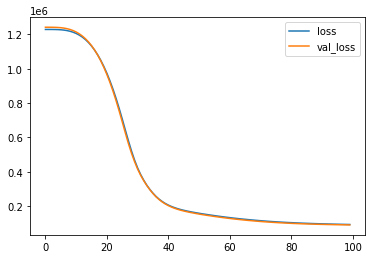

In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [22]:
losses['loss']

0       1.228219e+06
1       1.228218e+06
2       1.228219e+06
3       1.228218e+06
4       1.228218e+06
            ...     
3883    8.178901e+04
3884    8.179037e+04
3885    8.179141e+04
3886    8.179378e+04
3887    8.179057e+04
Name: loss, Length: 3888, dtype: float64

In [58]:
lrs = 1e-2 * (10**(np.arange(100)/20))

In [59]:
lrs

array([1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
       6.30957344e-02, 7.07945784e-02, 7.94328235e-02, 8.91250938e-02,
       1.00000000e-01, 1.12201845e-01, 1.25892541e-01, 1.41253754e-01,
       1.58489319e-01, 1.77827941e-01, 1.99526231e-01, 2.23872114e-01,
       2.51188643e-01, 2.81838293e-01, 3.16227766e-01, 3.54813389e-01,
       3.98107171e-01, 4.46683592e-01, 5.01187234e-01, 5.62341325e-01,
       6.30957344e-01, 7.07945784e-01, 7.94328235e-01, 8.91250938e-01,
       1.00000000e+00, 1.12201845e+00, 1.25892541e+00, 1.41253754e+00,
       1.58489319e+00, 1.77827941e+00, 1.99526231e+00, 2.23872114e+00,
       2.51188643e+00, 2.81838293e+00, 3.16227766e+00, 3.54813389e+00,
       3.98107171e+00, 4.46683592e+00, 5.01187234e+00, 5.62341325e+00,
      

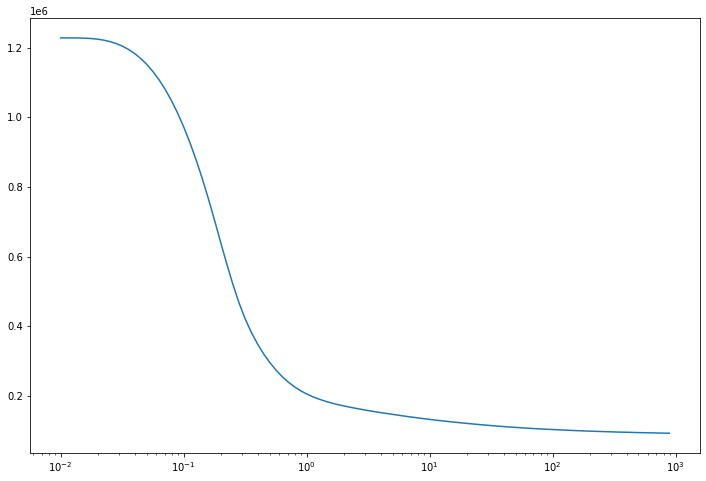

In [60]:
plt.figure(figsize=(12,8))
plt.semilogx(lrs, losses['loss'])